# Librerias

In [1]:
import pandas as pd
import missingno as msno
import numpy as np

In [2]:
rating = pd.read_csv(r"../data/rating.csv")

In [3]:
rating.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40


In [4]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000263 entries, 0 to 20000262
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  object 
dtypes: float64(1), int64(2), object(1)
memory usage: 610.4+ MB


In [6]:
# nombre de columnas
rating.columns

Index(['userid', 'movieid', 'rating', 'timestamp'], dtype='object')

In [5]:
# Cambiar nombre de columnas
rating = rating.rename(
    columns={
        "movieId": "movieid",
        "userId": "userid",
    }
)

In [7]:
rating.columns

Index(['userid', 'movieid', 'rating', 'timestamp'], dtype='object')

Visualizar valores ausente y valores unicos

In [8]:
# Visualizar valores unicos
valores_unicos = rating.nunique()

In [9]:
# Cuantos valores ausentes 
valores_ausentes = rating.isnull().sum()

In [ ]:
rating.columns

Index(['movieid', 'title', 'genres'], dtype='object')

In [10]:
type(rating)

pandas.core.frame.DataFrame

In [11]:
rating.isnull().sum().info()

<class 'pandas.core.series.Series'>
Index: 4 entries, userid to timestamp
Series name: None
Non-Null Count  Dtype
--------------  -----
4 non-null      int64
dtypes: int64(1)
memory usage: 64.0+ bytes


In [12]:
# Suma de Nulos que estan en la columna rating_esrb
rating.isnull().sum()["userid"]

np.int64(0)

In [13]:
tota_datos = len(rating)

In [14]:
# Convertir un tipo de dato a otro
datos_generales = pd.DataFrame({
    "Valores unicos": valores_unicos,
    "Nulos": valores_ausentes
})
datos_generales

,Valores unicos,Nulos
userid,138493,0
movieid,26744,0
rating,10,0
timestamp,15351121,0


In [15]:
# Porcentaje de ausentes en todas las columnas con formateados round
round(rating.isnull().mean() * 100 , 1)

userid       0.0
movieid      0.0
rating       0.0
timestamp    0.0
dtype: float64

Cantidad de valores no nulos (grafico)

<Axes: >

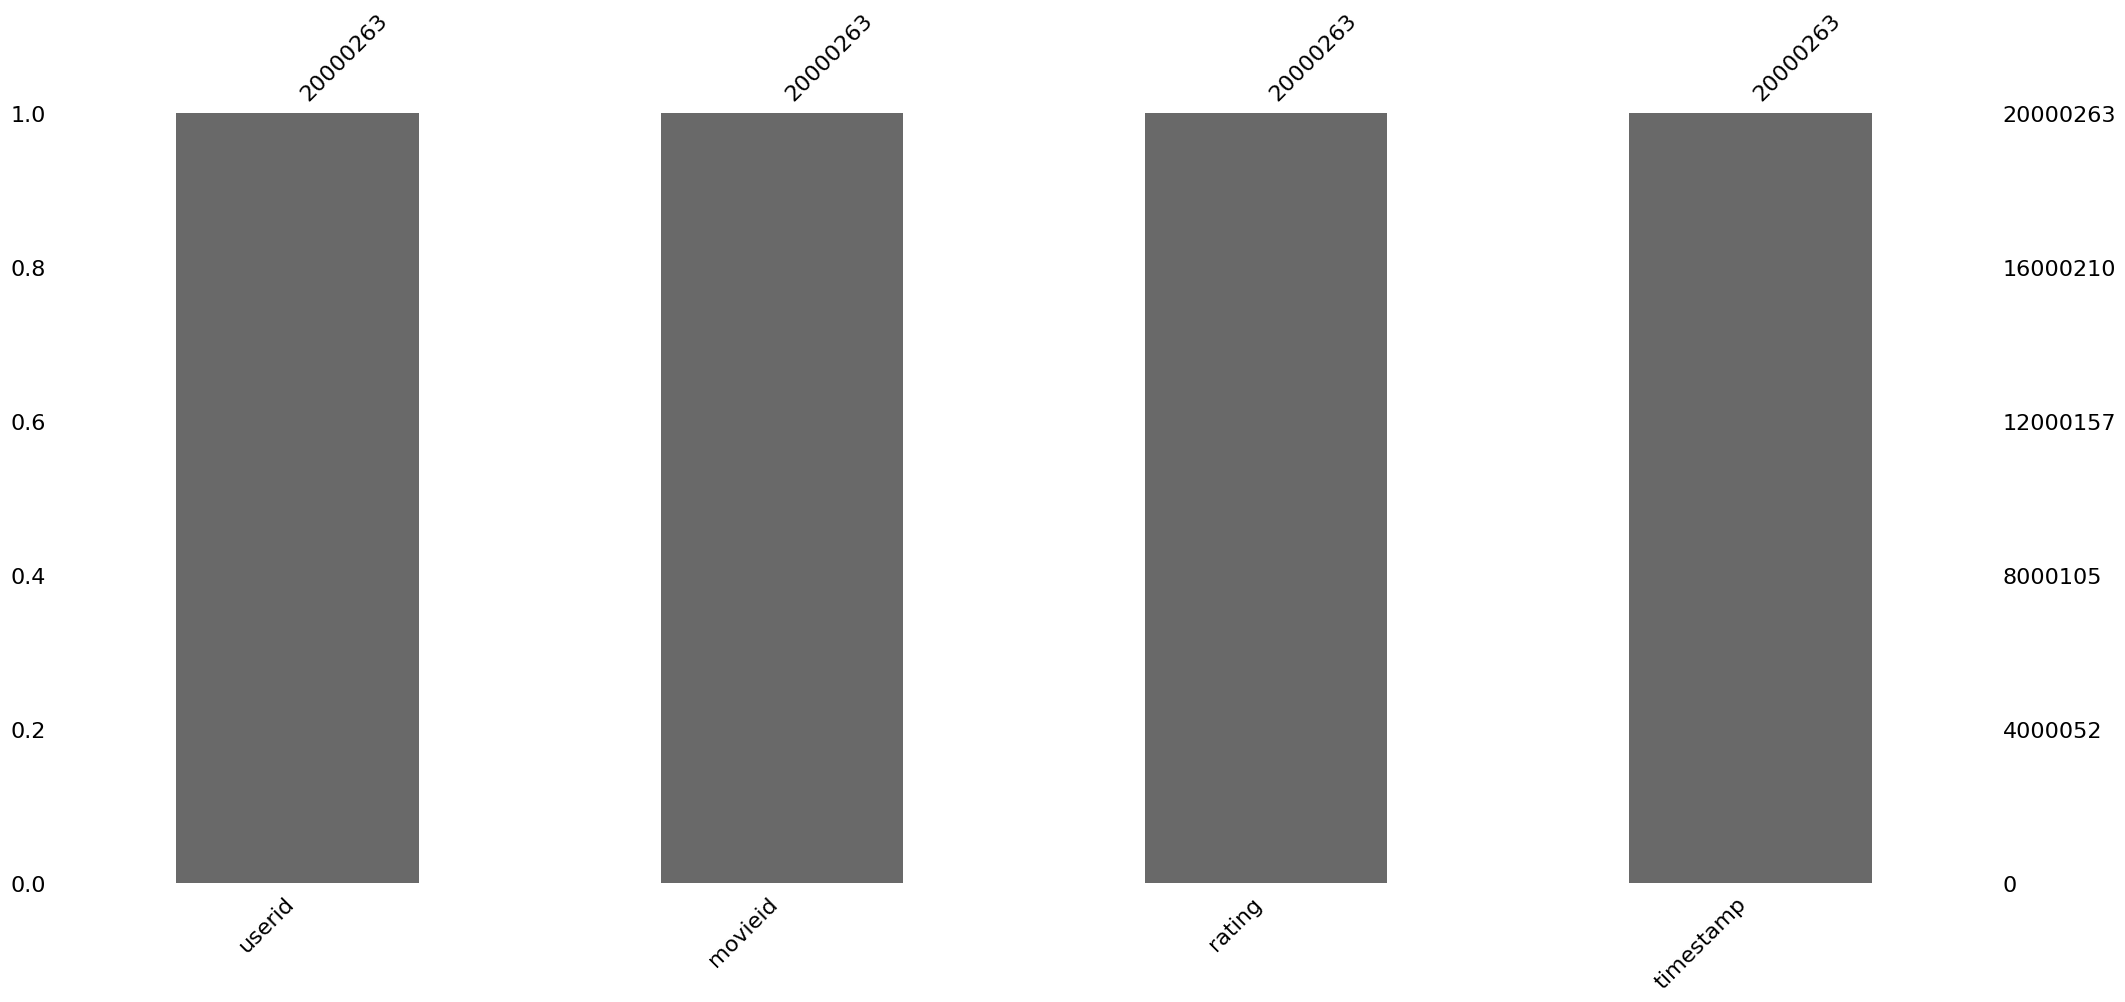

In [16]:
# Crear distintos graficos para visualizar mejor forma los datos
msno.bar(rating)

Matriz de valores ausentes

<Axes: >

d:\Personal\UNIANDES\OneDrive\OneDrive - UNIANDES\SEMINARIO\Proyecto\seminario-complexivo-grupo8\venv\Lib\site-packages\matplotlib\image.py:183: UserWarning: Data with more than 2**24 rows cannot be accurately displayed. Downsampling to less than 2**24 rows before displaying. To remove this warning, manually downsample your data.
  warnings.warn(msg.format(n='2**24 rows'))


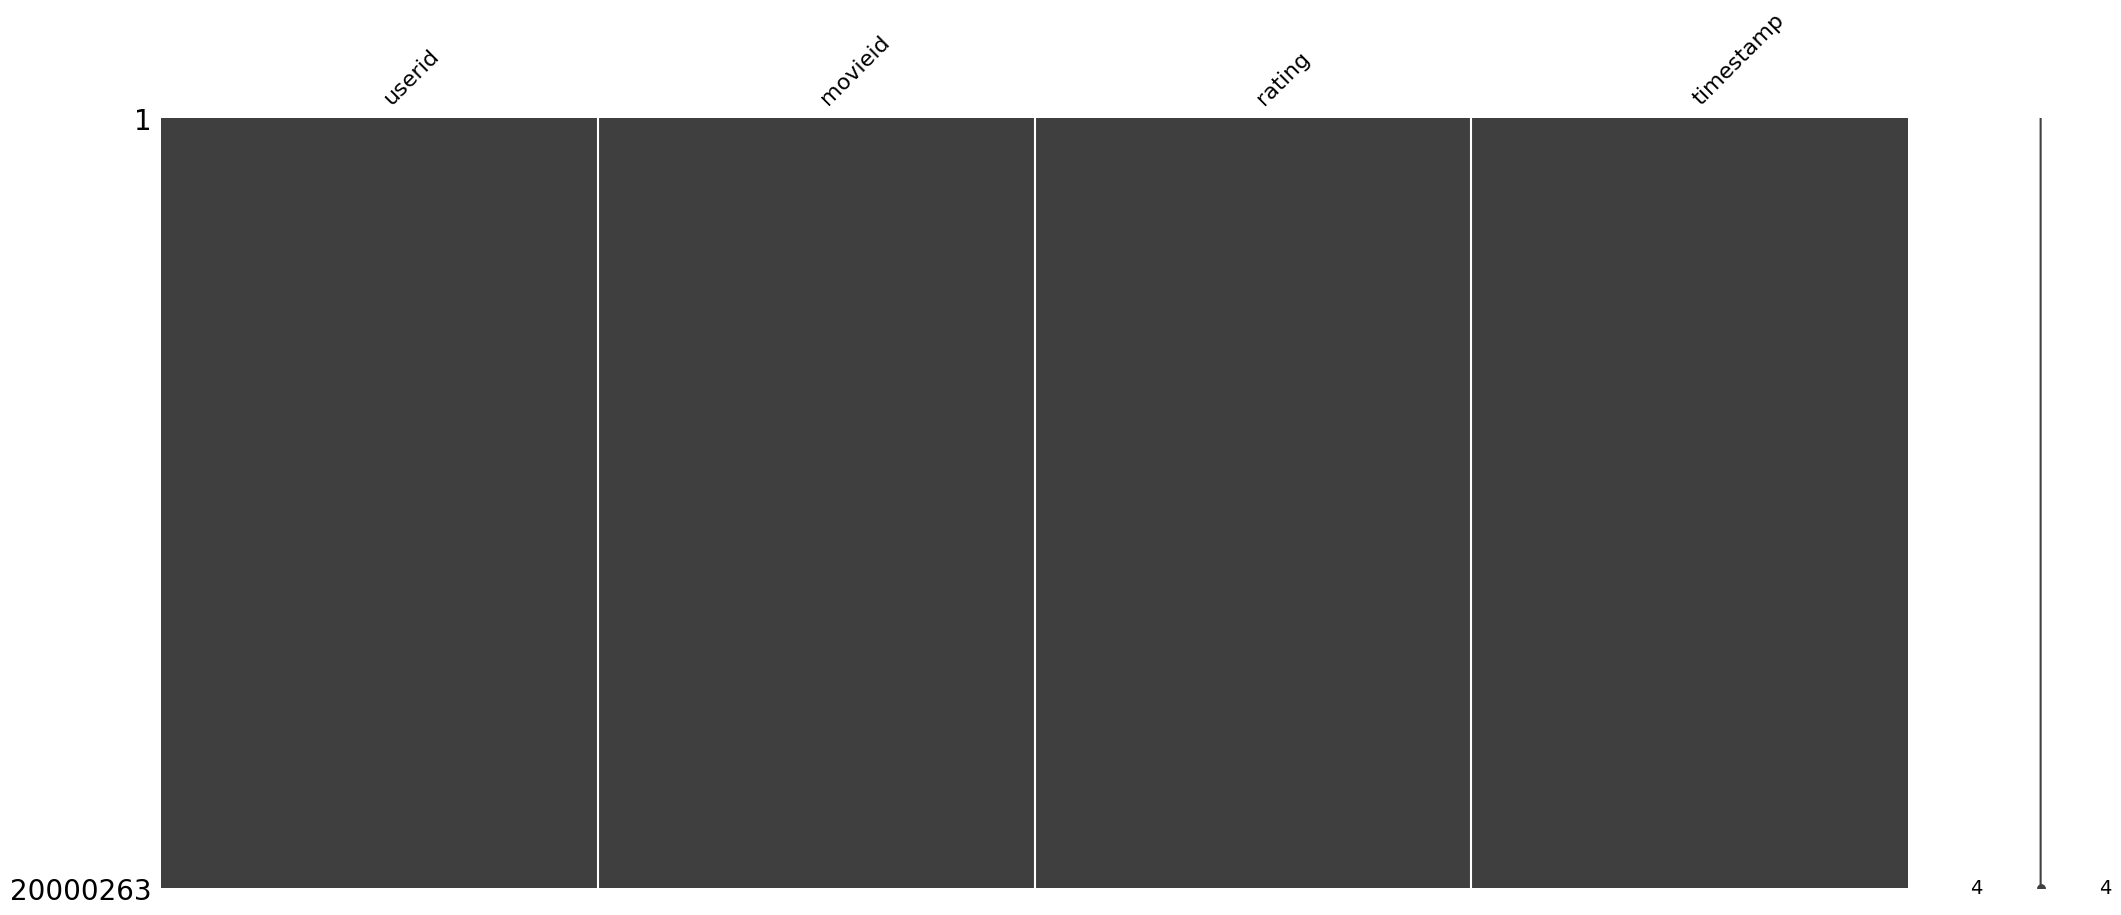

In [17]:
# Matriz de valores ausentes 
msno.matrix(rating)

La librería `missingno` se concentra en visualizar y analizar datos en valores ausentes

## HEATMAP

Este es un mapa de calor, que indica valores ausentes.

Por ejemplo genre vs name, nos indica que hay valores ausentes en dos filas

User Score vs Critic Store tiene 0.8, es decir en casi todas hay datos ausentes y quiere decir que donde es ausente en User Score tambien es ausente en Critic Store

d:\Personal\UNIANDES\OneDrive\OneDrive - UNIANDES\SEMINARIO\Proyecto\seminario-complexivo-grupo8\venv\Lib\site-packages\seaborn\matrix.py:309: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
d:\Personal\UNIANDES\OneDrive\OneDrive - UNIANDES\SEMINARIO\Proyecto\seminario-complexivo-grupo8\venv\Lib\site-packages\seaborn\matrix.py:309: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


<Axes: >

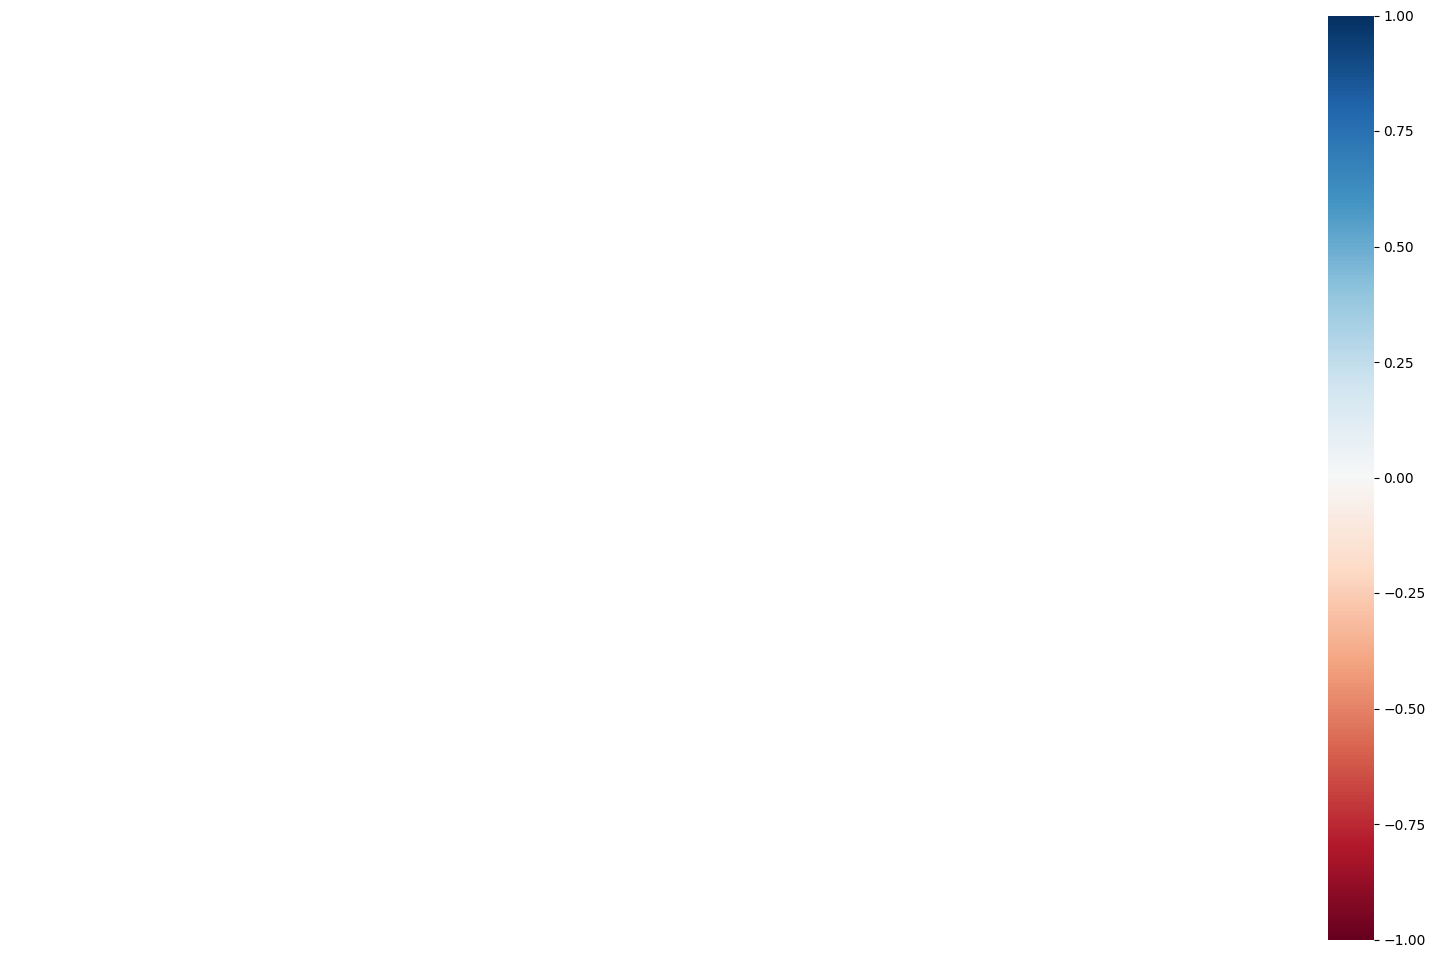

In [18]:
msno.heatmap(rating)

## Analizar de forma rápida los datos por columnas

Conteo total de datos categoricos numericos continuos.  

*Frecuencia o distribución de los datos*

In [20]:
rating["rating"].value_counts(normalize=True) * 100 

rating
4.0    27.809264
3.0    21.455683
5.0    14.493109
3.5    11.000635
4.5     7.674019
2.0     7.154891
2.5     4.416932
1.0     3.403615
1.5     1.396242
0.5     1.195609
Name: proportion, dtype: float64

Aqui podemos ver si hay columnas iguales pero case sensitive diferente ej: "Sports" y "sports"

## Automatización del código

In [ ]:
rating.columns

Index(['movieid', 'title', 'genres'], dtype='object')

In [21]:
for column in rating.columns:
    print(f"------- {column} --------")
    p = rating[column].value_counts(normalize=True, dropna=False) * 100 
    print(p)
    print()
    
    # NAN -> valores ausentes 

------- userid --------
userid
118205    0.046269
8405      0.037575
82418     0.028230
121535    0.027600
125794    0.027455
            ...   
3030      0.000100
3034      0.000100
36560     0.000100
3046      0.000100
127908    0.000100
Name: proportion, Length: 138493, dtype: float64

------- movieid --------
movieid
296       0.336546
356       0.330856
318       0.316826
593       0.316491
480       0.298571
            ...   
120833    0.000005
120831    0.000005
110052    0.000005
123188    0.000005
121699    0.000005
Name: proportion, Length: 26744, dtype: float64

------- rating --------
rating
4.0    27.809264
3.0    21.455683
5.0    14.493109
3.5    11.000635
4.5     7.674019
2.0     7.154891
2.5     4.416932
1.0     3.403615
1.5     1.396242
0.5     1.195609
Name: proportion, dtype: float64

------- timestamp --------
timestamp
1996-03-01 00:00:00    0.003215
2010-02-25 22:00:19    0.001035
2005-07-26 19:24:47    0.000530
2005-03-22 16:36:49    0.000340
2005-03-22 07:05:59

Ver tipos de datos

In [ ]:
rating.dtypes

# tbd -> no determinado

movieid     int64
title      object
genres     object
dtype: object

## ResetIndex

Ordenar los resuntados por una columna diferente a la del valor de porcentaje

reset_index() -> rerita el indice a la columna por defecto y crea una nueva danto la secuencia de 0 en adelante. 

sort_values() -> determina la columna por la que se ordenará

In [23]:
df = (rating["rating"].value_counts(normalize=True)*100).reset_index().sort_values(by="rating", ascending=False)
df

,rating,proportion
2,5.0,14.493109
4,4.5,7.674019
0,4.0,27.809264
3,3.5,11.000635
1,3.0,21.455683
6,2.5,4.416932
5,2.0,7.154891
8,1.5,1.396242
7,1.0,3.403615
9,0.5,1.195609


## Resumen estadistico .describe()

Sobre las columnas numericas

- count -> total
- mean-> promedio
- std -> desviación estándar
- min -> valor minimo 
- max -> valor maximo

In [24]:
rating.describe()

,userid,movieid,rating
count,2.000026e+07,2.000026e+07,2.000026e+07
mean,6.904587e+04,9.041567e+03,3.525529e+00
std,4.003863e+04,1.978948e+04,1.051989e+00
min,1.000000e+00,1.000000e+00,5.000000e-01
25%,3.439500e+04,9.020000e+02,3.000000e+00
50%,6.914100e+04,2.167000e+03,3.500000e+00
75%,1.036370e+05,4.770000e+03,4.000000e+00
max,1.384930e+05,1.312620e+05,5.000000e+00


Estadistica de los objetos => strings

In [26]:
categorical_data = rating.select_dtypes(include=["int64","float64"])
categorical_data.describe()

,userid,movieid,rating
count,2.000026e+07,2.000026e+07,2.000026e+07
mean,6.904587e+04,9.041567e+03,3.525529e+00
std,4.003863e+04,1.978948e+04,1.051989e+00
min,1.000000e+00,1.000000e+00,5.000000e-01
25%,3.439500e+04,9.020000e+02,3.000000e+00
50%,6.914100e+04,2.167000e+03,3.500000e+00
75%,1.036370e+05,4.770000e+03,4.000000e+00
max,1.384930e+05,1.312620e+05,5.000000e+00


In [ ]:
numerical_data = rating.select_dtypes(include="int64")
numerical_data

,movieid
0,1
1,2
2,3
3,4
4,5
...,...
27273,131254
27274,131256
27275,131258
27276,131260


Cambiar el tipo de dato a una columna

In [ ]:
rating.columns

Index(['movieid', 'title', 'genres'], dtype='object')

## Limpiando la columna user_score

In [ ]:
rating["movieid"].value_counts(dropna=False)
# tbd -> NAN not a number -> vacio -> no existe

movieid
1         1
2         1
3         1
4         1
5         1
         ..
131254    1
131256    1
131258    1
131260    1
131262    1
Name: count, Length: 27278, dtype: int64

In [ ]:
# Reemplazar valores de columnas especificamente tbd o nan
rating["User_Score"] = rating["User_Score"].replace("tbd", np.nan)
#np.nan -> es un valor formateado coreectamente como ausente
rating["User_Score"].value_counts(dropna=False)

User_Score
NaN    9125
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.3       2
1         2
0.9       2
0         1
9.7       1
Name: count, Length: 96, dtype: int64